In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Housing Dataset.ipynb', 'housingData-Real.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import dataset

data = pd.read_csv('housingData-Real.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [11]:
# selecting columns

livingSpace = data['sqft_living']
price = data['price']

In [13]:
livingSpace

0        1180
1        2570
2         770
3        1960
4        1680
5        5420
6        1715
7        1060
8        1780
9        1890
10       3560
11       1160
12       1430
13       1370
14       1810
15       2950
16       1890
17       1600
18       1200
19       1250
20       1620
21       3050
22       2270
23       1070
24       2450
25       1710
26       2450
27       1400
28       1520
29       2570
         ... 
21583     710
21584    1260
21585    1870
21586    1430
21587    1520
21588    1210
21589    2540
21590    4910
21591    2770
21592    1190
21593    4170
21594    2500
21595    1530
21596    3600
21597    3410
21598    3118
21599    3990
21600    4470
21601    1425
21602    1500
21603    2270
21604    1490
21605    2520
21606    3510
21607    1310
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [14]:
#convert livingspace into 2D matrix
X = np.array(livingSpace).reshape(-1,1)

In [15]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [16]:
#convert price into 2D matrix
y = np.array(price)

In [17]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [18]:
# convert the data into test and training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3)

In [19]:
X_test.shape

(7205, 1)

In [20]:
X_train.shape

(14408, 1)

In [21]:
# pass your data into Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#create a predictor
predictor = regressor.predict(X_test)

In [23]:
predictor

array([533125.12936083, 439882.30929827, 615065.78941581, ...,
       527474.04935704, 177107.08912195, 309907.46921106])

Text(0,0.5,'Price')

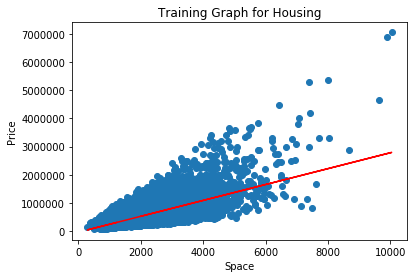

In [31]:
#Graphs

#plot for training dataset

plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Training Graph for Housing')
plt.xlabel('Space')
plt.ylabel('Price')

Text(0,0.5,'Price')

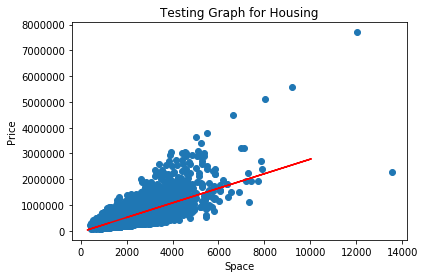

In [32]:
#Graphs

#plot for test dataset

plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Testing Graph for Housing')
plt.xlabel('Space')
plt.ylabel('Price')